In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
os.chdir('/zhome/71/c/146676/reconstructors_for_hpc')
import preprocessor
from preprocessor import load_config, load_folder, flat_dark_correction, rearrange_data, paganin_batch, save_volume_as_tiffs, run_paganin_in_batches

/zhome/71/c/146676/miniconda3/envs/cil/lib/python3.11/site-packages/dxchange/__init__.py:63: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


Data is acquired in 7 batches: 7 different FOVs of the meteorite. These should be stacked on top of each other in the end to stitch the whole reconstruction together. The goal is that a single yaml file should control all parameters for reconstruction. 

The reconstruction pipeline will be done as follows:
We iterate over each of the 7 folders

For each fol
Load projections, flats and darks
Crop projections, flat and darks (some of the detector is outside the beam)
Apply Paganin phase contrast filter

In [ ]:
cfg = load_config("reconstruction_settings_1.yaml")
projs, flat, dark = load_folder(cfg, folder=2)
data = flat_dark_correction(cfg, projs, flat, dark)   #### Do flux correction
rearranged_data = rearrange_data(cfg, data)
p_data = run_paganin_in_batches(cfg, rearranged_data).transpose([1,0,2])
save_volume_as_tiffs(cfg, 2, p_data)


## what to do now:
# Implement a function that can save a folder using multiprocessing. It should work just with the config file, and one argument specifying the folder to process
# Give chatGPT the context of the preprocessor file.

# After that has been done, create a new python file, which specifies the reconstruction

# After that, make a postprocessing file that does the normalization and stitching. Checks: Find out whether the mean intensity of meteorite area is the same in all 7 folders.

[Folder 2] Loaded dark (790, 1748), flat (790, 1748)
[Folder 2] Loading 600 projections with 24 workers...
[Folder 2] Loaded projections: (600, 790, 1748)
Splitting data into 3 batches of up to 100 slices each.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:25<00:00,  3.92it/s]


(790, 300, 3248)
[Folder 2] Saving 790 slices to /work3/msaca/preprocessing_run_001/HA900_3um_mars_rock_002_ with 24 workers...
[Folder 2] Done saving 790 slices.


In [ ]:
print(np.mean(rearranged_data))
print(np.mean(p_data))

0.17611957
0.13322404


188960.2991835443
471.6532223427688
174281.31674050633
172555.99406329115


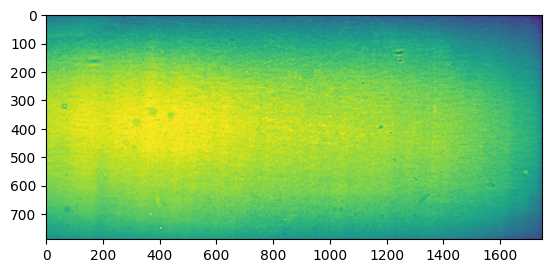

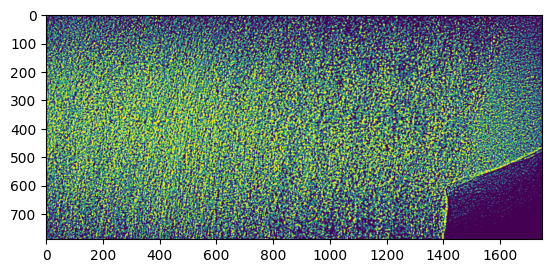

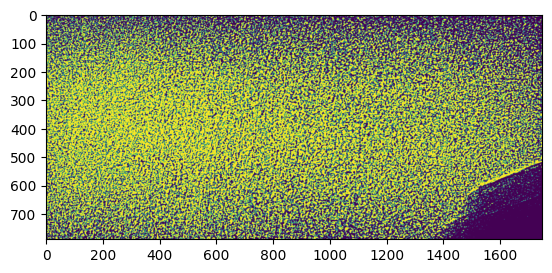

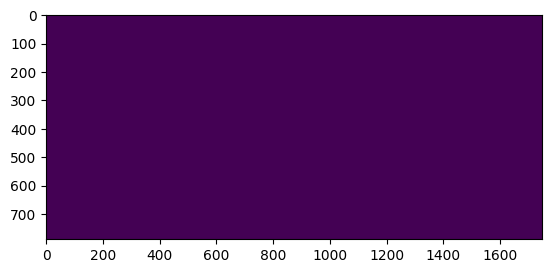

In [14]:
print(np.mean(flat[:,0:200]))
print(np.mean(dark[:,0:200]))
print(np.mean(projs[0,:,0:200]))
print(np.mean(projs[-1,:,0:200]))
plt.imshow(flat)
plt.clim([150000,200000])
plt.show()
plt.imshow(projs[0])
plt.clim([150000,200000])
plt.show()
plt.imshow(projs[-1])
plt.clim([150000,180000])
plt.show()
plt.imshow(dark)
plt.clim([15000,20000])
plt.show()

In [9]:
print(np.mean(flat[0:200,0:200]))
print(np.mean(dark[0:200,0:200]))
print(np.mean(projs[0,0:200,0:200]))

185957.1049
472.07387811050415
163686.129825


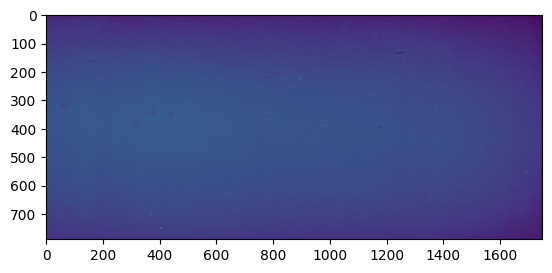

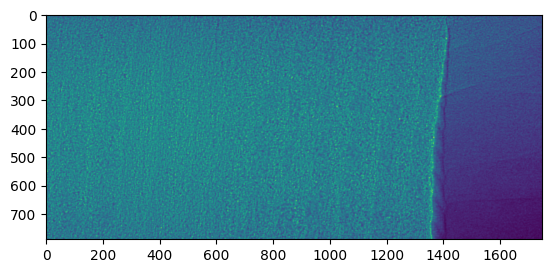

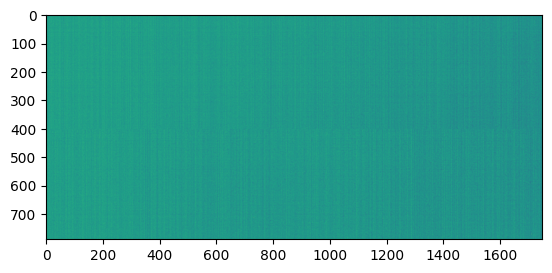

In [10]:
plt.imshow(flat)
plt.show()
plt.imshow(projs[0])
plt.show()
plt.imshow(dark)
plt.show()